In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
# flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
image = cv2.imread("PollenSegmentation/image/P57627-130r.jpg")

noise_height = max(0, min(image.shape[0], 0))

# Loại bỏ nhiễu bằng cách chuyển các pixel trong phía trên của ảnh thành màu đen
image[:noise_height, :, :] = [0, 0, 0]

# noise_start_col = 164
# noise_end_col = 180

# noise_start_col = max(0, min(image.shape[1], noise_start_col))
# noise_end_col = max(0, min(image.shape[1], noise_end_col))

# Loại bỏ nhiễu bằng cách chuyển các pixel trong khoảng cột đã chỉ định thành màu đen
# image[:, noise_start_col:noise_end_col, :] = [0, 0, 0]

In [28]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h_channel = hsv_image[:, :, 0]

(300, 180)


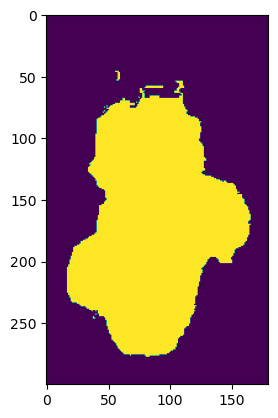

In [29]:
# Xác định vùng màu H cần lọc
lower_hue = 0    
upper_hue = 60   

hue_mask = cv2.inRange(h_channel, lower_hue, upper_hue)
print(hue_mask.shape)
plt.imshow(hue_mask)

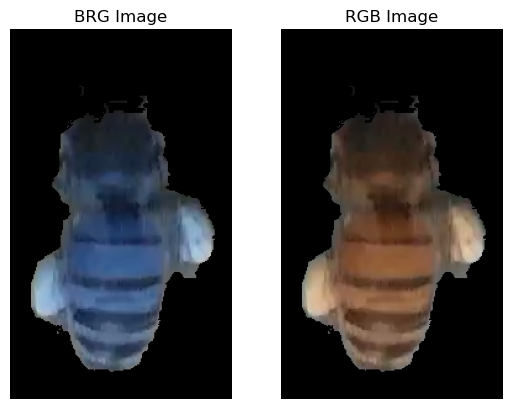

In [30]:
# Áp dụng mask lên ảnh gốc
image_BRG = cv2.bitwise_and(image, image, mask=hue_mask)
plt.subplot(1, 2, 1)
plt.imshow(image_BRG)
plt.axis('off')  # Tắt hiển thị trục
plt.title("BRG Image")
image_RGB = cv2.cvtColor(image_BRG, cv2.COLOR_BGR2RGB)
# Tạo subplot với 1 hàng và 3 cột
plt.subplot(1, 2, 2)
plt.imshow(image_RGB)
plt.axis('off')  # Tắt hiển thị trục
plt.title("RGB Image")
x,y,z = image_RGB.shape

In [31]:
# cv2.imwrite("RGB_Image.png", image_BRG)

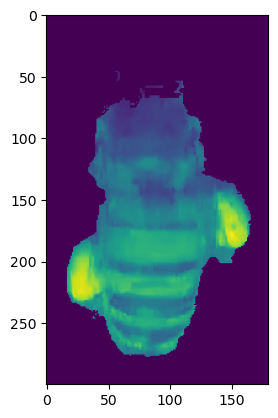

In [32]:
hsv_image = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2HSV)
hsv_image = hsv_image[:, :, 2]
plt.imshow(hsv_image)
# cv2.imwrite("hsv_image_V.png", hsv_image)

In [33]:

    # Áp dụng thuật toán Otsu để tính toán giá trị ngưỡng tối ưu
_, thresholded_image = cv2.threshold(hsv_image, 130, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Lấy kích thước ảnh
height, width = hsv_image.shape

    # Tạo một ma trận màu trắng để làm mặt nạ
mask = np.ones((height, width), dtype=np.uint8) * 255

    # Thiết lập phần nền của mặt nạ thành màu đen dựa trên kết quả của Otsu
mask[thresholded_image == 0] = 0

    # Hiển thị mặt nạ
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()



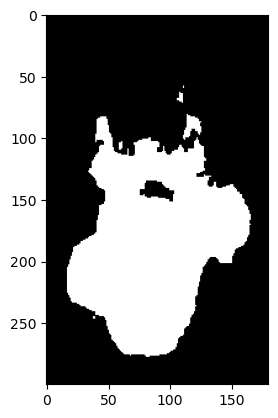

In [34]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# Thực hiện phép toán đóng
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')
# cv2.imwrite("After_Close.png", closing)

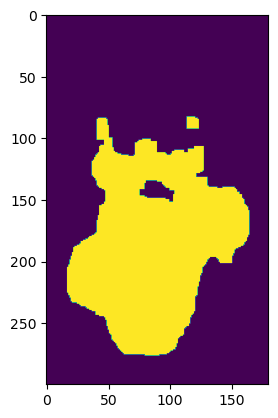

In [35]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
# Thực hiện phép toán mở

opened_image = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
plt.imshow(opened_image)
# cv2.imwrite("After_Open.png", opened_image)

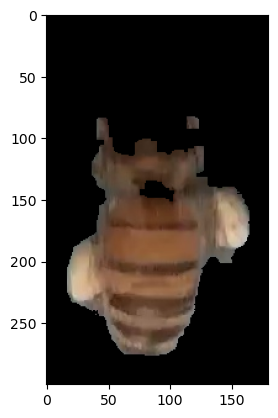

In [36]:
# Áp dụng mask lên ảnh gốc để tách phần nền
background = cv2.bitwise_and(image_RGB,image_RGB, mask=opened_image)
plt.imshow(background)

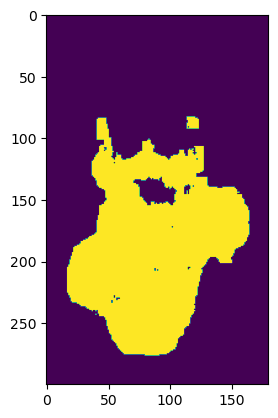

In [39]:
gray_image = cv2.cvtColor(background, cv2.COLOR_RGB2GRAY)

# Áp dụng ngưỡng để phân đoạn
_, thresholded_imageRGB = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresholded_imageRGB)
# cv2.imwrite("Thress_hold_2.png", thresholded_imageRGB)